# Introduction
This Jupyter notebook should help you a little bit with setting up HW6.
<br>
First we load an example Environment "FrozenLake-v0" (see https://reinforcementlearning4.fun/2019/06/16/gym-tutorial-frozen-lake/ ) and we explore how openAI works. Feel free to write you own little adaption of the code to become more familair with this.
Afterwards I have copied the pytests for Multi-Armed-Bandit (MBA) and Q-Learning into this jupyter notebook and you can run those tests within this jupyter notebook. 

In [110]:
# frozen-lake-ex1.py
import gym # loading the Gym library        
import numpy as np
import matplotlib.pyplot as plt

# When developping modules in python you want to automatically reload them when changed.
# Please have a look here how this works:
# https://switowski.com/blog/ipython-autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
env = gym.make("FrozenLake-v0")
env.reset()    

print("What is the Action Space:")
print(env.action_space)
print("What is size of the Action Space:")
print(env.action_space.n)

print("Draw a few random samples: ")
for k in range(0,5):
    print(env.action_space.sample())

What is the Action Space:
Discrete(4)
What is size of the Action Space:
4
Draw a few random samples: 
1
2
3
1
2


In [112]:
print("What is the observation space?")
print(env.observation_space)
print(env.observation_space.sample())
print(env.observation_space.n)

What is the observation space?
Discrete(16)
0
16


In [113]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [114]:
MAX_ITERATIONS = 10
env.render()
for i in range(MAX_ITERATIONS):
    random_action = env.action_space.sample()
    new_state, reward, done, info = env.step(
       random_action)
    env.render()
    if done:
        break


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


# Build an environment that is not slippery to see the reward

In [115]:
actions = {
    'Left': 0,
    'Down': 1,
    'Right': 2, 
    'Up': 3
}
 
print('---- winning sequence ------ ')
winning_sequence = (2 * ['Right']) + (3 * ['Down']) + ['Right']
print(winning_sequence)
 
env = gym.make("FrozenLake-v0",is_slippery=False) 
# TASK: set is_slippery to false and observe what happens
env.reset()
env.render()
 
for a in winning_sequence:
    new_state, reward, done, info = env.step(actions[a])
    print()
    env.render()
    print("Reward: {:.2f}".format(reward))
    print(info)
    if done:
        break  
 
print()

---- winning sequence ------ 
['Right', 'Right', 'Down', 'Down', 'Down', 'Right']

SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG
Reward: 0.00
{'prob': 1.0}

  (Right)
SFFF
FHFH
FFFH
HFFG
Reward: 0.00
{'prob': 1.0}

  (Down)
SFFF
FHFH
FFFH
HFFG
Reward: 0.00
{'prob': 1.0}

  (Down)
SFFF
FHFH
FFFH
HFFG
Reward: 0.00
{'prob': 1.0}

  (Down)
SFFF
FHFH
FFFH
HFFG
Reward: 0.00
{'prob': 1.0}

  (Right)
SFFF
FHFH
FFFH
HFFG
Reward: 1.00
{'prob': 1.0}



# Implement MultiArmedBandit

#### First Step: Go to src "MultiArmedBandit" and make the changes in code, then come back here and see the effects of the changes live

In [116]:
from src import MultiArmedBandit

For passing the FrozenLake we only have to implement the .fit functions. So it might be a good idea to start with this

In [117]:
np.random.seed(0)

env = gym.make('FrozenLake-v0')
env.seed(0)

agent = MultiArmedBandit(epsilon=0.2)
state_action_values, rewards = agent.fit(env, steps=10000)

assert state_action_values.shape == (16, 4)
assert len(rewards) == 100

print(state_action_values)
print(rewards)

[[0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]
 [0.         0.00655022 0.00654854 0.00512821]]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.02 0.02 0.01
 0.   0.01 0.01 0.03 0.   0.01 0.   0.01 0.01 0.02 0.   0.   0.01 0.
 0.   0.   0.   0.   0.02 0.02 0.   0.02 0.01 0.01 0.01 0.01 0.   0.01
 0.   0.   0.   0.01 0.   0.   0.   

## Now we implement the predict function, for that we use a different gym environment

In [118]:
np.random.seed(0)

env = gym.make('SlotMachines-v0', n_machines=10, mean_range=(-10, 10), std_range=(5, 10))
means = np.array([m.mean for m in env.machines])

[ 0.97627008  4.30378733  2.05526752  0.89766366 -1.52690401  2.91788226
 -1.24825577  7.83546002  9.27325521 -2.33116962]


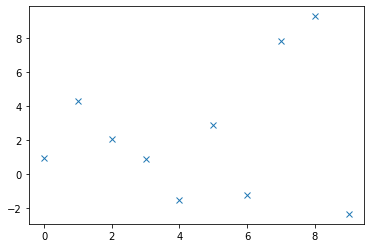

In [119]:
print(means)
plt.plot(means,'x')

In [120]:
agent = MultiArmedBandit(epsilon=0.2)
state_action_values, rewards = agent.fit(env, steps=10000)

assert state_action_values.shape == (1, 10)
assert len(rewards) == 100
assert np.argmax(means) == np.argmax(state_action_values)

states, actions, rewards_predict = agent.predict(env, state_action_values)
assert len(states) == 1
assert len(actions) == 1 and actions[0] == np.argmax(means)
assert len(rewards_predict) == 1

# Implement Q-Learning

## Test the desterimnistic environment for Q-learning
This requires implementation of the "predict" function

In [121]:
"""
Tests that the QLearning implementation successfully navigates a
deterministic environment with provided state-action-values.
"""
from src import QLearning

np.random.seed(0)

env = gym.make('FrozonLakeNoSlippery-v0')
env.reset()
env.seed(0)

[0]

In [122]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [123]:
agent = QLearning(epsilon=0.5, discount=0.95)
state_action_values = np.array([
    [0.0, 0.7, 0.3, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.51, 0.49, 0.0],
    [0.0, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.5, 0.0],
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 0.2, 0.8, 0.0],
    [0.0, 0.2, 0.8, 0.0],
    [0.0, 0.6, 0.4, 0.0],
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0],
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0]
])

states, actions, rewards = agent.predict(env, state_action_values)
assert np.all(states == np.array([4, 8, 9, 10, 14, 15]))
assert np.all(actions == np.array([1, 1, 2, 2, 1, 2]))
assert np.all(rewards == np.array([0, 0, 0, 0, 0, 1]))

## Now implement the FIT function for Q-Learning 

In [124]:
"""
Tests that the QLearning implementation successfully learns the
FrozenLake-v0 environment.
"""
from src import QLearning

np.random.seed(0)

env = gym.make('FrozenLake-v0')
env.reset()
env.seed(0)

[0]

In [125]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [126]:
agent = QLearning(epsilon=0.2, discount=0.95)
state_action_values, rewards = agent.fit(env, steps=10000)

state_values = np.max(state_action_values, axis=1)

assert state_action_values.shape == (16, 4)
assert len(rewards) == 100

assert np.allclose(state_values[np.array([5, 7, 11, 12, 15])], np.zeros(5))
assert np.all(state_values[np.array([0, 1, 2, 3, 4, 6, 8, 9, 10, 13, 14])] > 0)

State Action Value (shape) (16, 4)
Action count (shape): (16, 4)


In [127]:
print(state_action_values)
print(rewards.shape)
print(rewards)

[[0.00960789 0.01228849 0.01085123 0.00614481]
 [0.00569692 0.00808829 0.0110898  0.01645868]
 [0.03112818 0.02270186 0.02496603 0.01437928]
 [0.00902774 0.0060459  0.00462023 0.01786018]
 [0.02798165 0.03052711 0.01283507 0.0078561 ]
 [0.         0.         0.         0.        ]
 [0.06509822 0.02555111 0.05716095 0.00914774]
 [0.         0.         0.         0.        ]
 [0.02329913 0.06674491 0.03750659 0.07653262]
 [0.0699447  0.16974907 0.14452346 0.07438071]
 [0.19484704 0.15225591 0.14858419 0.06399919]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.09386677 0.16338306 0.27823305 0.16990609]
 [0.25290769 0.32686855 0.30253787 0.45836909]
 [0.         0.         0.         0.        ]]
(100,)
[0.   0.   0.01 0.02 0.01 0.   0.   0.   0.01 0.   0.01 0.   0.01 0.
 0.01 0.   0.   0.   0.   0.01 0.   0.   0.01 0.03 0.   0.   0.   0.
 0.   0.01 0.01 0.01 0.01 0.   0.02 0.02 0.   0.   0.01 0.   0.   0.01
 0.   0.01 0.01 0.   0.   0.   

# Now try out if it works for 'SlotMachines'

In [128]:
"""
Tests that the Qlearning implementation successfully finds the slot
machine with the largest expected reward.
"""
from src import QLearning

np.random.seed(0)

env = gym.make('SlotMachines-v0', n_machines=10, mean_range=(-10, 10), std_range=(5, 10))
env.seed(0)
means = np.array([m.mean for m in env.machines])

agent = QLearning(epsilon=0.2, discount=0)
state_action_values, rewards = agent.fit(env, steps=10000)

assert state_action_values.shape == (1, 10)
assert len(rewards) == 100
assert np.argmax(means) == np.argmax(state_action_values)

states, actions, rewards = agent.predict(env, state_action_values)
assert len(actions) == 1 and actions[0] == np.argmax(means)
assert len(states) == 1 and states[0] == 0
assert len(rewards) == 1

State Action Value (shape) (1, 10)
Action count (shape): (1, 10)


In [129]:
print(rewards)

[14.9223177]
